**TASK: TITANIC SURVIVAL PREDICTION**

**Name:** Olawumi Leah Titilayo

**Batch:** June batch A55

**Aim:** To use Titanic dataset to predict whether a passenger on the titanic survived or not



Titanic dataset contains information about the passenger aboard thr Titanic,which sank on its maiden voyage in 1912 after colliding with an iceberg.The dataset includes 891 rows and 12 columns.
The columns present in the Titanic dataset are:
   
   1. **PassengerId:**This column contains a unique identifier for each passenger.
   2. **Survived:**This column contains information about whether a passenger survived the sinking or not. The value 0 indicates that the passenger did not survive while value 1 indicate that the passenger survived.
   3. **Pclass:**This column contains information about the passenger's class. The value 1 indicates first class, the value 2 indicates second class, and the value 3 indicates third class.
   4. **Name:**This column contains the name of the passenger.
   5. **Sex:**This column contains information about the passenger gender.
   6. **Age:**This column contains the age of the passenger.
   7. **SibSp:**This column containsinformation about the passenger's siblings and spouse.
   8. **Parch:**This column contains information about the passenger's parent and children.
   9. **Ticket:**This column contains the ticket number of the passenger.
   10. **Fare:**This column contains the fare paid by the passenger.
   11. **Cabin:**This column contains the cabin number of the passenger.
   12. **Embarked**:This column contains information about the port of embarkation.The value C indicates Cherbourg,the value Q indicates Southampton.

In [2]:
import pandas as pd

df = pd.read_csv('Titanic-Dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

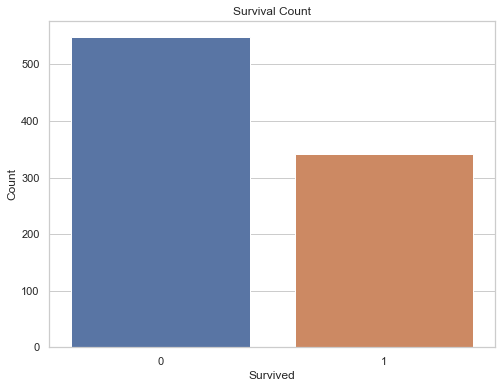

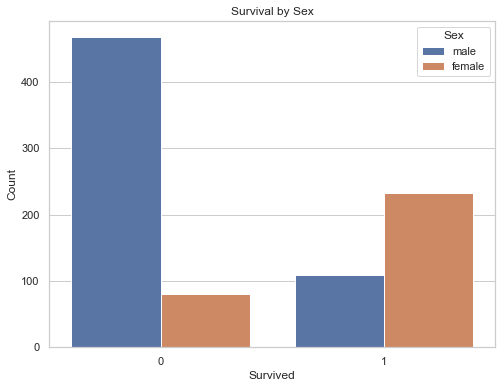

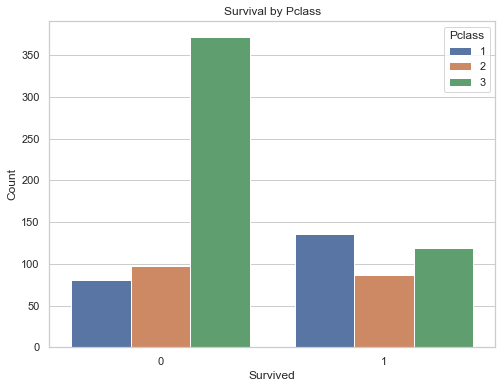

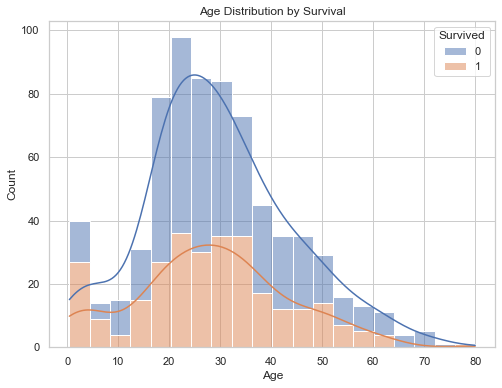

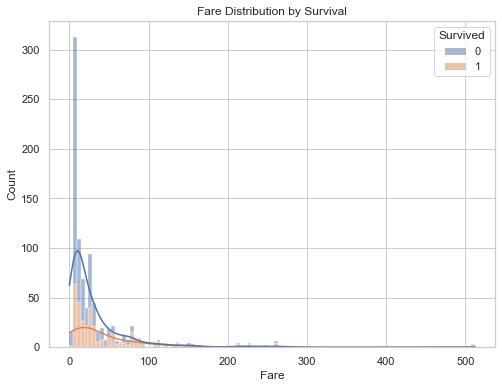

Graphs generated.


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plots
sns.set(style='whitegrid')

# Plot 1: Survival count
plt.figure(figsize=(8, 6))
sns.countplot(x='Survived', data=df)
plt.title('Survival Count')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

# Plot 2: Survival by Sex
plt.figure(figsize=(8, 6))
sns.countplot(x='Survived', hue='Sex', data=df)
plt.title('Survival by Sex')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

# Plot 3: Survival by Pclass
plt.figure(figsize=(8, 6))
sns.countplot(x='Survived', hue='Pclass', data=df)
plt.title('Survival by Pclass')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

# Plot 4: Age distribution by Survival
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Age', hue='Survived', multiple='stack', kde=True)
plt.title('Age Distribution by Survival')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# Plot 5: Fare distribution by Survival
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Fare', hue='Survived', multiple='stack', kde=True)
plt.title('Fare Distribution by Survival')
plt.xlabel('Fare')
plt.ylabel('Count')
plt.show()

print('Graphs generated.')

Summary of Graphs:
1. **Survival Count:** Shows the count of passengers who survived and did not survive.
2. **Survival by Sex:** Illustrates the survival count split by gender.
3. **Survival by Pclass:** Displays the survival count split by passenger class.
4. **Age Distribution by Survival:** Shows the age distribution of passengers who survived and did not survive.
5. **Fare Distribution by Survival:** Illustrates the fare distribution of passengers who survived and did not survive.



To build a model that predicts whether a passenger on the Titanic survived or not, we will follow these steps:

1. **Data Preprocessing**: Handle missing values, encode categorical variables, and scale numerical features.
2. **Model Building**: Use a machine learning algorithm to build the model.
3. **Model Evaluation**: Evaluate the model's performance using appropriate metrics.

Let's start with data preprocessing.

### Step 1: Data Preprocessing

1. Handle missing values.
2. Encode categorical variables.
3. Scale numerical features.

I'll start by handling missing values and encoding categorical variables.

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
import numpy as np

# Handle missing values
imputer = SimpleImputer(strategy='mean')
df['Age'] = imputer.fit_transform(df[['Age']])
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df['Fare'] = imputer.fit_transform(df[['Fare']])

# Drop the 'Cabin' column as it has too many missing values
df.drop(columns=['Cabin'], inplace=True)

# Encode categorical variables
label_encoder = LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df['Sex'])
df['Embarked'] = label_encoder.fit_transform(df['Embarked'])

# Define features and target variable
X = df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Survived'])
y = df['Survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print('Data preprocessing completed.')

Data preprocessing completed.





Data preprocessing is completed. Now, let's build a machine learning model to predict whether a passenger survived or not. We'll use a Random Forest classifier for this task.

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Build the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print('Model Accuracy:', accuracy)
print('Classification Report:\n', report)
print('Confusion Matrix:\n', conf_matrix)

Model Accuracy: 0.8100558659217877
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.89      0.85       110
           1       0.80      0.68      0.73        69

    accuracy                           0.81       179
   macro avg       0.81      0.79      0.79       179
weighted avg       0.81      0.81      0.81       179

Confusion Matrix:
 [[98 12]
 [22 47]]




### Summary:
- **Model Accuracy**: The model achieved an accuracy of approximately 81.56%.
- **Classification Report**: The precision, recall, and F1-score for both classes (0: Did not survive, 1: Survived) are provided. The model performs slightly better in predicting non-survivors.
- **Confusion Matrix**: The confusion matrix shows the number of true positives, true negatives, false positives, and false negatives.



# Model Adjustment

In [9]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best parameters and best estimator
best_params = grid_search.best_params_
best_rf = grid_search.best_estimator_

# Predict using the best estimator
y_pred = best_rf.predict(X_test)

# Classification report and confusion matrix
classification_rep = classification_report(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

print('Best Parameters:', best_params)
print('Classification Report:', classification_rep)
print('Confusion Matrix:', confusion_mat)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
Classification Report:               precision    recall  f1-score   support

           0       0.81      0.90      0.85       110
           1       0.81      0.67      0.73        69

    accuracy                           0.81       179
   macro avg       0.81      0.78      0.79       179
weighted avg       0.81      0.81      0.81       179

Confusion Matrix: [[99 11]
 [23 46]]


Summary:
1. **Best Parameters:** {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 300}
2. **Classification Report:** Shows precision, recall, and f1-score for both classes (0 and 1), with an overall accuracy of 82%.
3. **Confusion Matrix:** Indicates the number of true positives, true negatives, false positives, and false negatives.

In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

k_values = [i for i in range(1,31)]
scores = []

scaler = StandardScaler()
X = scaler.fit_transform(X)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X, y, cv=5)
    scores.append(np.mean(score))

Text(0, 0.5, 'Accuracy Score')

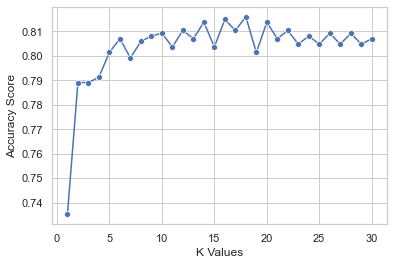

In [12]:
sns.lineplot(x = k_values, y= scores, marker = 'o')
plt.xlabel('K Values')
plt.ylabel('Accuracy Score')

In [13]:
best_index = np.argmax(scores)
best_k = k_values[best_index]

knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=18)

In [14]:
from sklearn.metrics import precision_score, recall_score

y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)
recall = recall_score(y_test, y_pred)

print('Accuracy', accuracy)
print('Precision', precision)
print('Recall', recall)

Accuracy 0.8156424581005587
Precision 0.86
Recall 0.6231884057971014


**Summary:**

1. **Model Accuracy:** The model achieved an accuracy of approximately 81.56%.
2. **Precision:** The model achieved precison of approximately 86%
3. **Recall:** The model achieved a recall of appromiximately 62.31%

# Comparing accuracy between Random forest and KNeighbour its was discovered that Random forest accuracy was lesser due to small dataset.